In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
Wineries = pd.read_csv("C:\\Users\\ashri\\Desktop\\Ontologies\\wineries.csv")
Area = pd.read_csv("C:\\Users\\ashri\\Desktop\\Ontologies\\ava.csv")

In [3]:
null_cunt = Wineries.isnull().sum()
null_cunt

name            0
status         28
prod_orig       0
prod_curr       0
estab_date    140
total_size      0
ava            28
boundary        0
dtype: int64

In [4]:
Wineries = Wineries.fillna('Unknown') 

In [5]:
#Now lets merge two datasets
Dataframe= pd.merge(Wineries, Area, on='ava', how='left')

In [6]:
Dataframe = Dataframe.fillna("unknown")

In [7]:
print(Dataframe.columns)

Index(['name', 'status', 'prod_orig', 'prod_curr', 'estab_date', 'total_size',
       'ava', 'boundary_x', 'boundary_y'],
      dtype='object')


In [8]:
Dataframe['ava'].unique()

array(['Napa Valley', 'Howell Mountain', 'Calistoga',
       'Diamond Mountain District', 'St Helena', 'Chiles Valley District',
       'Spring Mountain District', 'Rutherford', 'Oakville', 'Atlas Peak',
       'Yountville', 'Stags Leap District', 'Mount Veeder',
       'Oak Knoll District of Napa Valley', 'Coombsville', 'Los Carneros',
       'Unknown'], dtype=object)

In [53]:
data = Dataframe.head(2)

In [54]:
new_df = pd.DataFrame()
wines_list = []

for i in range(len(Dataframe['ava'])):
    for ava in Dataframe['ava']:
        
        wines_list.append(ava)

new_df['ava'] = wines_list


In [55]:
nodes = []

for i in range(len(data['ava'])):
    nodes.append((data['ava'][i],'haswinery', data['name'][i]))
    nodes.append((data['name'][i], 'isOf', data['total_size'][i]))
    nodes.append((data['total_size'][i], 'currentproductionOf', data['prod_curr'][i]))
    #for ava in Dataframe['ava']:
        #nodes.append((data['name'][i], 'locatedin' ,ava))

In [56]:

def create_graph(final_nodes,threshold=0):
    
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = str(final_nodes[i][0])
        ent2 = str(final_nodes[i][2])
        rel = final_nodes[i][1] 
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
        
    if(len(edge) == 0 or len(final_nodes) == 0):
        return None
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i], target[i], i)])
        #print(G.nodes)
        #print(G.edges)
        print("\nGraph generated")
        size = min(50, max(20, len(edge) / 2))  # Adjust 50 to a smaller number if still too large
        plt.figure(figsize=(size, size))
        edge_labels = dict([((u, v,), edge[d['weight']]) for u, v, d in G.edges(data=True)])
        pos = nx.spring_layout(G, k=0.8)
        nx.draw(G, with_labels=True, node_color='lightblue', node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15)
        plt.savefig('C:\\Users\\ashri\\Desktop\\Ontologies\\knowledge_graph.png')
        plt.show()
        return G, edge_labels
        


Graph generated


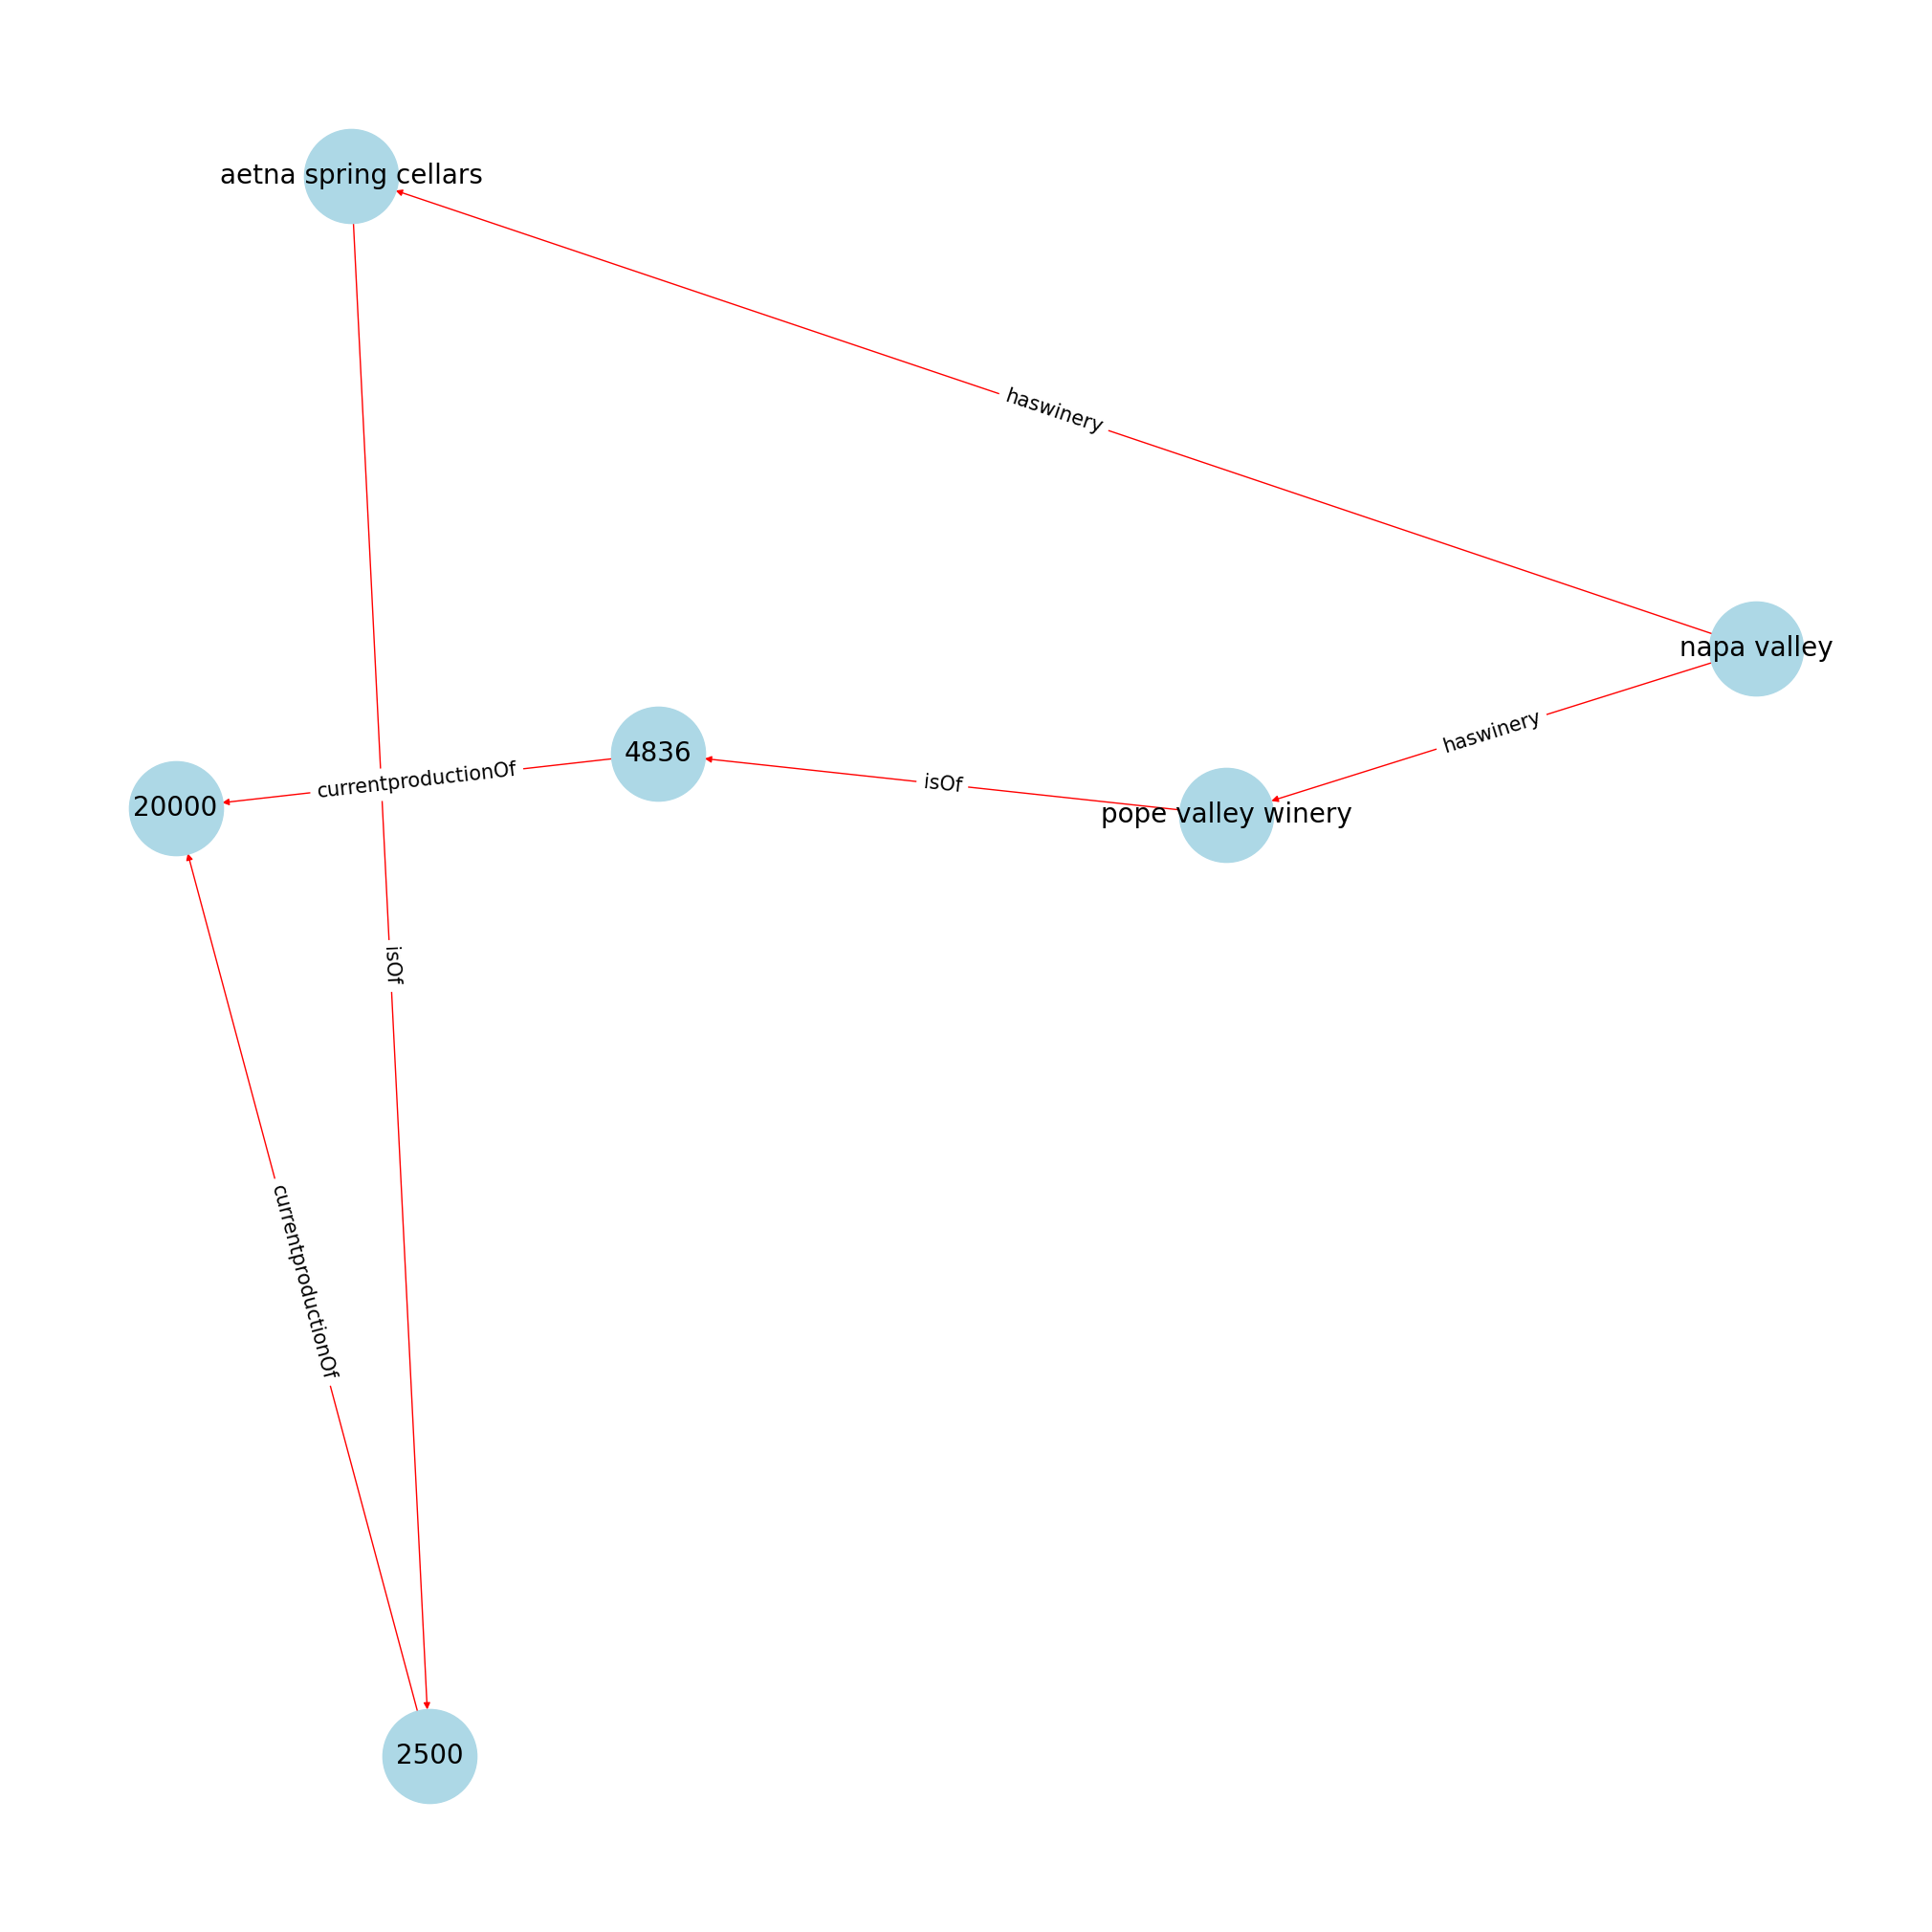

(<networkx.classes.digraph.DiGraph at 0x1f6cae562d0>,
 {('napa valley', 'aetna spring cellars'): 'haswinery',
  ('napa valley', 'pope valley winery'): 'haswinery',
  ('aetna spring cellars', '2500'): 'isOf',
  ('2500', '20000'): 'currentproductionOf',
  ('pope valley winery', '4836'): 'isOf',
  ('4836', '20000'): 'currentproductionOf'})

In [57]:
create_graph(nodes)